In [8]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Load the dataset and separate features and target variable
df = pd.read_csv('/content/Titanic-Dataset.csv')
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# 2. Identify numerical and categorical features for preprocessing
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# 3. Apply scaling and encoding using ColumnTransformer
# Preprocessing for numerical data: Impute missing values then Scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: Impute missing values then One-Hot Encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 4. Create a complete ML pipeline combining preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 5. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the pipeline and generate predictions on test data
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# 7. Evaluate using accuracy, precision, recall, and F1-score
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred)
}

# Display metrics
print("Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# 8. Save the evaluation metrics and the pipeline model
# Save metrics to CSV
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv('evaluation_metrics.csv', index=False)

# Save the model to a .pkl file
joblib.dump(pipeline, 'titanic_pipeline.pkl')

--- Evaluation Metrics ---
Accuracy:  0.8156
Precision: 0.7887
Recall:    0.7568
F1-score:  0.7724


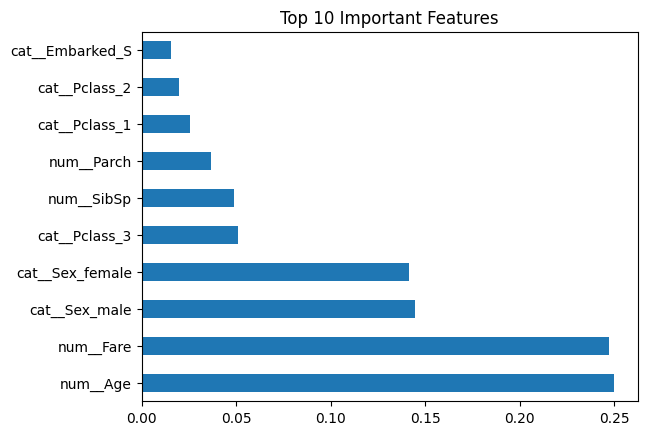

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Get feature names after preprocessing (OneHot encoding adds columns)
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# 2. Get importances from the classifier
importances = pipeline.named_steps['classifier'].feature_importances_

# 3. Create a summary
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()